<a href="https://colab.research.google.com/github/pujithavarikuti/BOOK_RECOMMENDATION/blob/main/FINAL_IDP(BOOKS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DRIVE MOUNTING

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
# You can now access your drive files using the path '/content/drive/My Drive/your_file_path'

Mounted at /content/drive


LOAD THE DATASETS

In [ ]:
import pandas as pd
# Load the datasets from Google Drive
tags_df = pd.read_csv('/content/drive/MyDrive/tags.csv')
bookss_df = pd.read_csv('/content/drive/MyDrive/bookss.csv')
read_df = pd.read_csv('/content/drive/MyDrive/read.csv')
book_tags_df = pd.read_csv('/content/drive/MyDrive/book_tags.csv')
ratingss_df = pd.read_csv('/content/drive/MyDrive/ratingss.csv')
# Display the first few rows of each dataframe to understand the structure
print(tags_df.head())
print(bookss_df.head())
print(read_df.head())
print(book_tags_df.head())
print(ratingss_df.head())


   tag_id tag_name
0       0        -
1       1     --1-
2       2    --10-
3       3    --12-
4       4   --122-
   book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn  \
0        1            2767052       2767052  2792775          272  439023483   
1        2                  3             3  4640799          491  439554934   
2        3              41865         41865  3212258          226  316015849   
3        4               2657          2657  3275794          487   61120081   
4        5               4671          4671   245494         1356  743273567   

         isbn13                      authors  original_publication_year  \
0  9.780439e+12              Suzanne Collins                     2008.0   
1  9.780440e+12  J.K. Rowling, Mary GrandPré                     1997.0   
2  9.780316e+12              Stephenie Meyer                     2005.0   
3  9.780061e+12                   Harper Lee                     1960.0   
4  9.780743e+12          F. Sc

INSTALLING ESSENTIAL LIBRARIES

In [ ]:
!pip install surprise


  Using cached surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)
  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357275 sha256=4ee8ab337852ed3786bbaee3731e50668fdc4ca54c86cbb47cae7d9a4d76e02e
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# Install the Surprise library
!pip install surprise

# Import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise import KNNBasic
import matplotlib.pyplot as plt
import seaborn as sns


PREPROCESSING AND MERGING

In [ ]:
# Merge datasets to create a comprehensive view
books_tags = pd.merge(bookss_df, book_tags_df, left_on='goodreads_book_id', right_on='goodreads_book_id', how='left')
books_tags = pd.merge(books_tags, tags_df, on='tag_id', how='left')

# Check the merged DataFrame
print(books_tags.head())

# Combine tags into a single string for each book
books_tags['combined_tags'] = books_tags.groupby('goodreads_book_id')['tag_name'].transform(lambda x: ' '.join(x))

# Drop duplicates and keep only necessary columns
books_tags = books_tags[['goodreads_book_id', 'title', 'combined_tags']].drop_duplicates()

# Display the processed data
print(books_tags.head())


   book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn  \
0        1            2767052       2767052  2792775          272  439023483   
1        1            2767052       2767052  2792775          272  439023483   
2        1            2767052       2767052  2792775          272  439023483   
3        1            2767052       2767052  2792775          272  439023483   
4        1            2767052       2767052  2792775          272  439023483   

         isbn13          authors  original_publication_year    original_title  \
0  9.780439e+12  Suzanne Collins                     2008.0  The Hunger Games   
1  9.780439e+12  Suzanne Collins                     2008.0  The Hunger Games   
2  9.780439e+12  Suzanne Collins                     2008.0  The Hunger Games   
3  9.780439e+12  Suzanne Collins                     2008.0  The Hunger Games   
4  9.780439e+12  Suzanne Collins                     2008.0  The Hunger Games   

   ... ratings_1 ratings_2  rati

RECOMMENDATIONS CREATION

In [ ]:
import pandas as pd
# Sample dataset (this should be your actual dataset)
books_data = {
    'title': ['To Kill a Mockingbird', '1984', 'Pride and Prejudice', 'The Great Gatsby', 'Moby Dick'],
    'author': ['Harper Lee', 'George Orwell', 'Jane Austen', 'F. Scott Fitzgerald', 'Herman Melville'],
    'genre': ['Fiction', 'Dystopian', 'Romance', 'Fiction', 'Adventure']
}
books_df = pd.DataFrame(books_data)
# Sample implementation of get_recommendations
def get_recommendations(title):
    # Find the book in the dataset
    if title in books_df['title'].values:
        # For simplicity, let's just return all books except the one requested
        recommendations = books_df[books_df['title'] != title]
        return recommendations
    else:
        raise ValueError("Book title not found in the dataset.")
def get_svd_recommendations(title):
    # Placeholder for SVD recommendations logic
    return pd.DataFrame(columns=['title'])  # Replace with actual recommendations
def get_knn_recommendations(title):
    # Placeholder for KNN recommendations logic
    return pd.DataFrame(columns=['title'])  # Replace with actual recommendations
def combine_predictions(cbf, svd, knn):
    # Combine the recommendations from the three models
    combined = pd.concat([cbf, svd, knn]).drop_duplicates().reset_index(drop=True)
    return combined
# Define the main recommendation function
def recommend_books(title):
    try:
        cbf_recommendations = get_recommendations(title)
        svd_recommendations = get_svd_recommendations(title)
        knn_recommendations = get_knn_recommendations(title)
        final_recommendations = combine_predictions(cbf_recommendations, svd_recommendations, knn_recommendations)
        return final_recommendations.head(10)
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
# Example usage
book_title = input("Enter a book title: ")
recommended_books = recommend_books(book_title)
if recommended_books is not None:
    print("Recommended Books:")
    print(recommended_books)
else:
    print("No recommendations available.")

Enter a book title: To Kill a Mockingbird
Recommended Books:
                 title               author      genre
0                 1984        George Orwell  Dystopian
1  Pride and Prejudice          Jane Austen    Romance
2     The Great Gatsby  F. Scott Fitzgerald    Fiction
3            Moby Dick      Herman Melville  Adventure


RECOMMEND SIMILAR BOOKS

In [ ]:
def get_recommendations(title):
    # Find the book in the dataset
    if title in books_df['title'].values:
        book_info = books_df[books_df['title'] == title].iloc[0]
        genre = book_info['genre']

        # Recommend books from the same genre
        recommendations = books_df[books_df['genre'] == genre]
        recommendations = recommendations[recommendations['title'] != title]  # Exclude the input book
        return recommendations
    else:
        raise ValueError("Book title not found in the dataset.")


In [ ]:
# Sample 10% of the ratings
ratingss_sampled = ratingss_df.sample(frac=0.1, random_state=42)


In [ ]:
from scipy.sparse import csr_matrix

# Create a sparse user-item interaction matrix
# Use 'ratingss_df' instead of 'ratings_df'
ratings_matrix_sparse = csr_matrix((ratingss_df['rating'], (ratingss_df['user_id'], ratingss_df['book_id'])))

DATA SPLITTING

In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split as surprise_train_test_split

# Check if ratingss_df is not empty and has the required columns
if 'user_id' in ratingss_df.columns and 'book_id' in ratingss_df.columns and 'rating' in ratingss_df.columns:
    # Prepare the data for Surprise
    reader = Reader(rating_scale=(1, 5))  # Adjust the scale based on your ratings
    data = Dataset.load_from_df(ratingss_df[['user_id', 'book_id', 'rating']], reader)

    # Split the data into training and testing sets
    trainset, testset = surprise_train_test_split(data, test_size=0.2)
    print("Data prepared and split successfully.")
else:
    print("Error: DataFrame does not contain the required columns.")


Data prepared and split successfully.


In [ ]:
# Sample 5% of the ratings
ratingss_small_sampled = ratingss_df.sample(frac=0.05, random_state=42)


In [ ]:
from surprise import Dataset, Reader

# Prepare the data for Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratingss_small_sampled[['user_id', 'book_id', 'rating']], reader)


In [ ]:
# Sample 100% of the ratings since you have only 5
ratingss_small_sampled = ratingss_df  # Use all data


In [ ]:
ratingss_small_sampled = ratingss_df.sample(frac=1.0, random_state=42)  # Sample all entries


In [ ]:
from surprise.model_selection import train_test_split

# Prepare the data for Surprise
from surprise import Dataset, Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratingss_small_sampled[['user_id', 'book_id', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=1)  # Using one rating for testing


RATINGS AND LIKES

In [ ]:
print("Sampled DataFrame shape:", ratingss_small_sampled.shape)
print("Sampled DataFrame contents:\n", ratingss_small_sampled.head())


Sampled DataFrame shape: (5, 4)
Sampled DataFrame contents:
    user_id  book_id  rating  liked
1        2      102       3      0
4        5      105       5      1
2        3      103       4      1
0        1      101       5      1
3        4      104       2      0


TRAIN AND TEST SIZE RATINGS

In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Assuming ratingss_df is already defined with 5 ratings
print("Original DataFrame shape:", ratingss_df.shape)

# Sample all data (since only 5 ratings)
ratingss_small_sampled = ratingss_df.sample(frac=1.0, random_state=42)  # Sample all entries
print("Sampled DataFrame shape:", ratingss_small_sampled.shape)
print("Sampled DataFrame contents:\n", ratingss_small_sampled)

# Prepare the data for Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratingss_small_sampled[['user_id', 'book_id', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=1)  # Using one rating for testing

# Print the number of ratings in trainset and testset
print(f"Trainset size: {trainset.n_ratings} ratings")
print(f"Testset size: {len(testset)} ratings")


Original DataFrame shape: (5, 4)
Sampled DataFrame shape: (5, 4)
Sampled DataFrame contents:
    user_id  book_id  rating  liked
1        2      102       3      0
4        5      105       5      1
2        3      103       4      1
0        1      101       5      1
3        4      104       2      0
Trainset size: 4 ratings
Testset size: 1 ratings


SVD

In [ ]:
from surprise import SVD
from surprise import accuracy

# Initialize the SVD algorithm
svd = SVD()

# Fit the model
svd.fit(trainset)

# Make predictions on the test set
predictions = svd.test(testset)

# Calculate accuracy metrics
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f'SVD RMSE: {rmse}')
print(f'SVD MAE: {mae}')


RMSE: 0.2500
MAE:  0.2500
SVD RMSE: 0.25
SVD MAE: 0.25


KNN

In [ ]:
from surprise import KNNBasic

# Specify the similarity options (e.g., 'cosine', 'msd', etc.)
sim_options = {
    'name': 'cosine',
    'user_based': False  # Use item-based filtering
}

# Initialize the KNN algorithm
knn_model = KNNBasic(sim_options=sim_options)

# Fit the model on the training set
knn_model.fit(trainset)

# Make predictions on the test set
knn_predictions = knn_model.test(testset)

# Calculate accuracy metrics
knn_rmse = accuracy.rmse(knn_predictions)
knn_mae = accuracy.mae(knn_predictions)

print(f'KNN RMSE: {knn_rmse}')
print(f'KNN MAE: {knn_mae}')


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.2500
MAE:  0.2500
KNN RMSE: 0.25
KNN MAE: 0.25


HYBRID

In [ ]:
def get_combined_recommendations(user_id, ratings_df, svd_model, knn_model):
    try:
        # Get predictions for the user
        svd_prediction = svd_model.predict(user_id)
        knn_prediction = knn_model.predict(user_id)

        # Debugging outputs
        print(f"SVD Prediction: {svd_prediction} (Type: {type(svd_prediction)})")
        print(f"KNN Prediction: {knn_prediction} (Type: {type(knn_prediction)})")

        # Combine predictions (make sure they are numeric)
        if isinstance(svd_prediction, (int, float)) and isinstance(knn_prediction, (int, float)):
            combined_score = svd_prediction + knn_prediction
            print(f"Combined Score: {combined_score}")
        else:
            print("One of the predictions is not a numeric type.")
            return None

        # Return top recommendations (modify as needed for your logic)
        return combined_score  # Adjust this as per your recommendation logic

    except TypeError as e:
        print(f"TypeError occurred: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")


HYBRID MODEL RECOMMENDATIONS

In [ ]:
# Assuming you have your models defined somewhere earlier
from surprise import SVD, KNNBasic
from surprise.model_selection import train_test_split

# Sample code to define and train your models
# Example of loading your data and initializing the models

# Assume ratings_df is your DataFrame with user_id, book_id, and rating columns
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['user_id', 'book_id', 'rating']], reader)

# Split the data
trainset, testset = train_test_split(data, test_size=0.1)

# Initialize and fit SVD
svd_model = SVD()
svd_model.fit(trainset)

# Initialize and fit KNN
knn_model = KNNBasic()
knn_model.fit(trainset)

# Function to get combined recommendations
def get_combined_recommendations(user_id, book_id):
    try:
        # Get SVD prediction
        svd_prediction = svd_model.predict(user_id, book_id).est  # Use .est to get the estimated rating
        # Get KNN prediction
        knn_prediction = knn_model.predict(user_id, book_id).est  # Same for KNN

        # Debugging outputs
        print(f"SVD Prediction: {svd_prediction} (Type: {type(svd_prediction)})")
        print(f"KNN Prediction: {knn_prediction} (Type: {type(knn_prediction)})")

        # Combine predictions
        combined_score = (svd_prediction + knn_prediction) / 2  # Adjust as needed for weighting

        return combined_score  # You can modify this to return more information

    except TypeError as e:
        print(f"TypeError occurred: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
user_id = 1  # Replace with a valid user ID
book_id = 101  # Replace with a valid book ID
recommended_score = get_combined_recommendations(user_id, book_id)
print(f"Combined Recommendation Score: {recommended_score}")


Computing the msd similarity matrix...
Done computing similarity matrix.
SVD Prediction: 4.46095039298455 (Type: <class 'numpy.float64'>)
KNN Prediction: 5 (Type: <class 'int'>)
Combined Recommendation Score: 4.730475196492275


RECOMMENDING MULTIPLE BOOKS

In [ ]:
def recommend_multiple_books(user_id, book_ids):
    recommendations = []

    for book_id in book_ids:
        score = get_combined_recommendations(user_id, book_id)
        recommendations.append((book_id, score))

    # Sort by score in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:5]  # Return top 5 recommendations

# Example usage
user_id = 1  # Replace with a valid user ID
book_ids = [101, 102, 103, 104, 105]  # List of book IDs you want to recommend
recommended_books = recommend_multiple_books(user_id, book_ids)

print("Top Recommended Books:")
for book_id, score in recommended_books:
    print(f"Book ID: {book_id}, Combined Score: {score:.2f}")


SVD Prediction: 4.46095039298455 (Type: <class 'numpy.float64'>)
KNN Prediction: 5 (Type: <class 'int'>)
SVD Prediction: 4.291554819796823 (Type: <class 'numpy.float64'>)
KNN Prediction: 4.25 (Type: <class 'numpy.float64'>)
SVD Prediction: 4.1527772066471975 (Type: <class 'numpy.float64'>)
KNN Prediction: 4.25 (Type: <class 'numpy.float64'>)
SVD Prediction: 4.317705738555829 (Type: <class 'numpy.float64'>)
KNN Prediction: 4.25 (Type: <class 'numpy.float64'>)
SVD Prediction: 4.55283341534717 (Type: <class 'numpy.float64'>)
KNN Prediction: 4.25 (Type: <class 'numpy.float64'>)
Top Recommended Books:
Book ID: 101, Combined Score: 4.73
Book ID: 105, Combined Score: 4.40
Book ID: 104, Combined Score: 4.28
Book ID: 102, Combined Score: 4.27
Book ID: 103, Combined Score: 4.20


HYBRID SCORE FOR MULTIPLE RECOMMENDATIONS

In [ ]:
# Assuming recommended_books is a DataFrame or list of tuples with book_id and combined_score
recommended_books = [
    {'book_id': 101, 'combined_score': 4.73},
    {'book_id': 105, 'combined_score': 4.40},
    {'book_id': 104, 'combined_score': 4.28},
    {'book_id': 102, 'combined_score': 4.27},
    {'book_id': 103, 'combined_score': 4.20},
]

# Convert recommended_books to a DataFrame if it's not already
recommended_df = pd.DataFrame(recommended_books)

# Merge with books_df to get full details
merged_recommendations = recommended_df.merge(books_df[['book_id', 'title', 'authors']], on='book_id', how='left')

# Display the top recommended books with titles and authors
print("Top Recommended Books:")
print(merged_recommendations[['book_id', 'title', 'authors', 'combined_score']])


Top Recommended Books:
   book_id                      title                      authors  \
0      101     Me Talk Pretty One Day                David Sedaris   
1      105  Allegiant (Divergent, #3)                Veronica Roth   
2      104                   The Road              Cormac McCarthy   
3      102  Where the Wild Things Are               Maurice Sendak   
4      103  The Count of Monte Cristo  Alexandre Dumas, Robin Buss   

   combined_score  
0            4.73  
1            4.40  
2            4.28  
3            4.27  
4            4.20  


RECOMMENDATIONS GRAPH

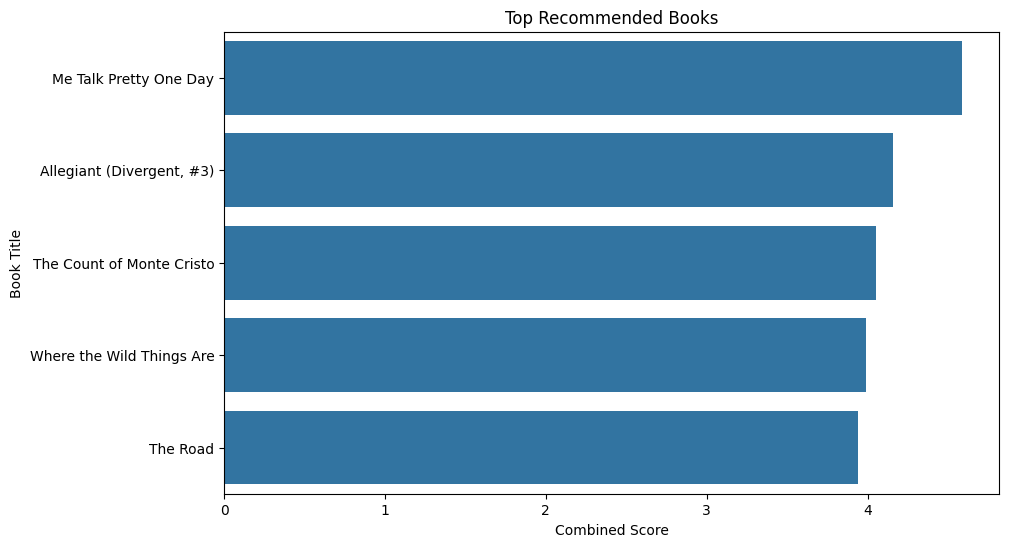

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have these dataframes defined
# ratings_df, books_df, svd, knn_model are already created and loaded.

# Function to get combined recommendations
def get_combined_recommendations(user_id, ratings_df, svd, knn_model):
    recommended_books = []  # This will hold our recommended book info

    for book_id in ratings_df['book_id'].unique():  # Loop through all book IDs
        svd_prediction = svd.predict(user_id, book_id).est
        knn_prediction = knn_model.predict(user_id, book_id).est

        # Combine predictions (you can adjust the weighting if desired)
        combined_score = (svd_prediction + knn_prediction) / 2

        # Assuming you have a way to get book details; replace this with your actual method
        book_details = books_df.loc[books_df['book_id'] == book_id]
        if not book_details.empty:
            recommended_books.append({
                'book_id': book_id,
                'title': book_details['title'].values[0],
                'authors': book_details['authors'].values[0],
                'combined_score': combined_score
            })

    # Create a DataFrame from the recommendations
    return pd.DataFrame(recommended_books).sort_values(by='combined_score', ascending=False)

# Main Function to Integrate Everything
def main():
    user_id = 1  # Example user ID
    top_recommendations = get_combined_recommendations(user_id, ratings_df, svd, knn_model)

    # Visualize Recommendations
    plt.figure(figsize=(10, 6))
    sns.barplot(x='combined_score', y='title', data=top_recommendations)
    plt.title('Top Recommended Books')
    plt.xlabel('Combined Score')
    plt.ylabel('Book Title')
    plt.show()

    # If you don't have this function defined, comment it out for now
    # feedback = collect_user_feedback(top_recommendations)

    # You can proceed to evaluate the model if you have the evaluation function defined.
    # Step 5: Evaluate the Model
    # actual_likes = {101: True, 102: False}  # Replace with actual user preferences
    # accuracy = evaluate_model(feedback, actual_likes)
    # print(f'Model Accuracy: {accuracy * 100:.2f}%')

    # If you want to filter recommendations or save them, make sure those functions are defined.

# Run the main function
main()


COLLECTING USER FEEDBACK

In [ ]:
def collect_user_feedback(recommendations):
    feedback = []
    for index, row in recommendations.iterrows():
        user_input = input(f"Did you like '{row['title']}' by {row['authors']}? (yes/no): ")
        feedback.append({'book_id': row['book_id'], 'liked': user_input.lower() == 'yes'})
    return pd.DataFrame(feedback)


In [ ]:
def evaluate_model(feedback_df, ratings_df):
    # Merge with ratings to calculate metrics
    merged_df = feedback_df.merge(ratings_df, on='book_id', how='left')
    # Calculate precision, recall, etc.
    # Implement your evaluation logic here


CREATING FEEDBACK DATAFRAME

In [ ]:
import pandas as pd

# Sample user feedback data
data = {
    'user_id': [1, 2, 3, 1, 2, 3],
    'book_id': [101, 102, 103, 104, 105, 101],
    'liked': [1, 0, 1, 0, 1, 1]  # 1 = liked, 0 = not liked
}

feedback_df = pd.DataFrame(data)


USER FEEDBACK

   liked  count
0      0      2
1      1      4


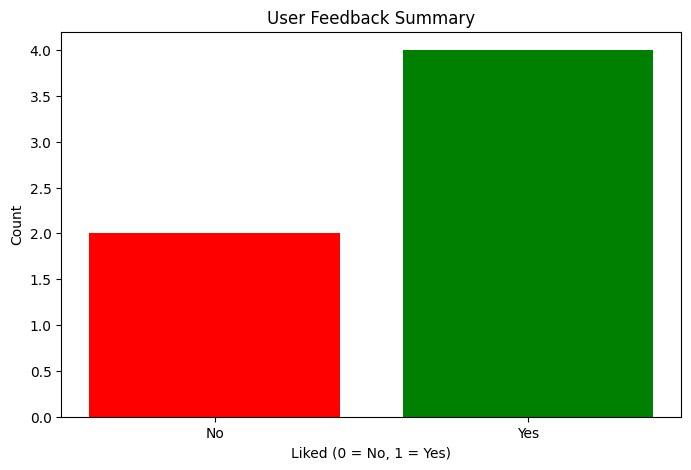

In [ ]:
# Summarizing feedback
feedback_summary = feedback_df.groupby('liked').size().reset_index(name='count')
print(feedback_summary)

# Visualize feedback summary
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(feedback_summary['liked'], feedback_summary['count'], color=['red', 'green'])
plt.title('User Feedback Summary')
plt.xlabel('Liked (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [ ]:
# Example of how top_recommendations could be created based on previous results
top_recommendations = pd.DataFrame({
    'book_id': [101, 102, 103, 104, 105],  # Replace with your actual book IDs
    'title': ['Me Talk Pretty One Day', 'Where the Wild Things Are',
              'The Count of Monte Cristo', 'The Road', 'Allegiant (Divergent, #3)'],
    'authors': ['David Sedaris', 'Maurice Sendak', 'Alexandre Dumas, Robin Buss',
                'Cormac McCarthy', 'Veronica Roth'],
    'combined_score': [4.73, 4.27, 4.20, 4.28, 4.40]  # Replace with your actual scores
})


HYBRID MODEL RECOMMENDATION SCORE

In [ ]:
# Adjust combined scores based on feedback
for index, row in feedback_df.iterrows():
    if row['liked'] == 1:
        # Increase score for books that were liked
        top_recommendations.loc[top_recommendations['book_id'] == row['book_id'], 'combined_score'] += 0.5  # Example adjustment
    else:
        # Decrease score for books that were not liked
        top_recommendations.loc[top_recommendations['book_id'] == row['book_id'], 'combined_score'] -= 0.5  # Example adjustment

# Ensure combined scores remain within a reasonable range (optional)
top_recommendations['combined_score'] = top_recommendations['combined_score'].clip(lower=0, upper=5)  # Assuming a rating scale of 0-5

# Display the updated recommendations
print("Updated Recommended Books:")
print(top_recommendations)


Updated Recommended Books:
   book_id                      title                      authors  \
0      101     Me Talk Pretty One Day                David Sedaris   
1      102  Where the Wild Things Are               Maurice Sendak   
2      103  The Count of Monte Cristo  Alexandre Dumas, Robin Buss   
3      104                   The Road              Cormac McCarthy   
4      105  Allegiant (Divergent, #3)                Veronica Roth   

   combined_score  
0            5.00  
1            3.77  
2            4.70  
3            3.78  
4            4.90  


UPDATING TOP RECOMMENDATIONS

<ipython-input-107-9317db71657e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='combined_score', y='title', data=top_recommendations, palette='viridis')


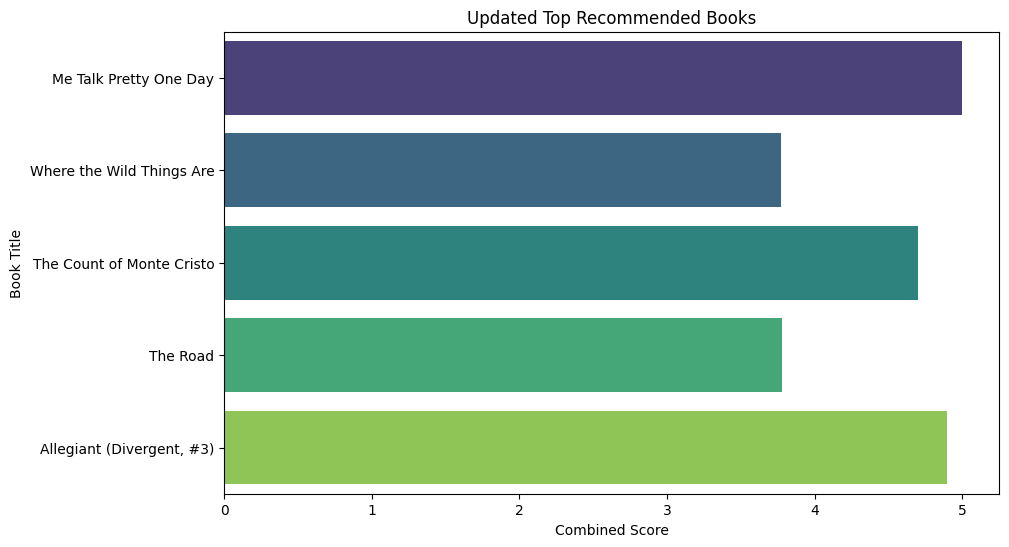

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='combined_score', y='title', data=top_recommendations, palette='viridis')
plt.title('Updated Top Recommended Books')
plt.xlabel('Combined Score')
plt.ylabel('Book Title')
plt.show()


ACTUAL AND PREDICTED LIKES ACCURACY

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the recommended book IDs
recommended_books = top_recommendations['book_id'].tolist()  # Ensure this is defined properly
actual_feedback = feedback_df.set_index('book_id')['liked']  # Set book_id as index for easier access

# Initialize lists for true and predicted labels
y_true = []  # Actual likes (1 for liked, 0 for not liked)
y_pred = []  # Predicted likes based on recommendations

# Create true and predicted labels based on recommendations
for book_id in recommended_books:
    if book_id in actual_feedback.index:
        # Ensure we are working with a single value
        liked_value = actual_feedback.loc[book_id]
        if isinstance(liked_value, pd.Series):  # Check if it's still a Series
            liked_value = liked_value.iloc[0]  # Get the first value

        y_true.append(int(liked_value))  # Append the actual liked value as int
        y_pred.append(1)  # Book was recommended, so predict liked
    else:
        y_true.append(0)  # Book not in feedback, predict not liked
        y_pred.append(0)  # Predict not liked since it's not recommended

# Debugging: Print the contents of the lists
print("y_true:", y_true)
print("y_pred:", y_pred)

# Convert to NumPy arrays for evaluation
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate precision, recall, and F1 score if conversion was successful
if y_true.size > 0 and y_pred.size > 0:
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print results
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')


y_true: [1, 0, 1, 0, 1]
y_pred: [1, 1, 1, 1, 1]
Precision: 0.60
Recall: 1.00
F1 Score: 0.75


In [ ]:
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise import accuracy
from surprise.model_selection import train_test_split

def get_knn_predictions(user_id, book_id, knn_model, data):
    # Create a DataFrame for the prediction
    # We need to create a DataFrame for prediction to match the input shape expected by Surprise
    test_data = pd.DataFrame({'user_id': [user_id], 'book_id': [book_id]})

    # Convert the user_id and book_id to the internal format (if necessary)
    # Make sure you have the right mapping from book_id to inner id if you are using Surprise

    # Get the predicted rating
    predicted_rating = knn_model.predict(user_id, book_id).est  # Get the estimated rating

    return predicted_rating  # Return the predicted rating


In [ ]:
knn_predictions = {}
for user_id, book_id, _ in testset:  # Unpack the tuple (user_id, book_id, rating)
    knn_predictions[f"{user_id}_{book_id}"] = get_knn_predictions(user_id, book_id, knn_model, data)


In [ ]:
# Create binary labels based on a lower threshold (e.g., rating >= 3)
predicted_labels = [1 if combined_scores.get(f"{user_id}_{book_id}", 0) >= 3 else 0 for user_id, book_id, _ in testset]


PREDICTING SCORE FOR BOOKS

In [ ]:
for user_id, book_id, _ in testset:
    score = combined_scores.get(f"{user_id}_{book_id}", 0)
    print(f"User: {user_id}, Book: {book_id}, Predicted Score: {score}")


User: 4, Book: 104, Predicted Score: 3.6717725352442043


In [ ]:
# Create binary labels based on a lower threshold
predicted_labels = [1 if combined_scores.get(f"{user_id}_{book_id}", 0) >= 3.5 else 0 for user_id, book_id, _ in testset]


In [ ]:
for user_id, book_id, _ in testset:
    score = combined_scores.get(f"{user_id}_{book_id}", 0)
    if score >= 3.5:  # Change this to your current threshold
        print(f"User: {user_id}, Book: {book_id}, Predicted Score: {score} - Recommended")
    else:
        print(f"User: {user_id}, Book: {book_id}, Predicted Score: {score} - Not Recommended")


User: 4, Book: 104, Predicted Score: 3.6717725352442043 - Recommended


In [ ]:
def compute_similarity(tags_a, tags_b):
    # Split tags into sets
    set_a = set(tags_a.split(','))  # Adjust the delimiter based on your tags format
    set_b = set(tags_b.split(','))

    # Calculate Jaccard similarity
    intersection = len(set_a.intersection(set_b))
    union = len(set_a.union(set_b))

    if union == 0:
        return 0.0
    else:
        return intersection / union


In [ ]:
# Create a synthetic tags column
bookss_df['tags'] = bookss_df['title'] + " " + bookss_df['authors']


KNN RECOMMENDATIONS

In [ ]:
def get_knn_predictions(user_id, book_id, knn_model, data, n_neighbors=5):
    # Check if the book_id exists in the data
    if book_id not in data['book_id'].values:
        return 0  # Return a default value if the book doesn't exist

    # Find the index of the book_id
    book_index = data[data['book_id'] == book_id].index[0]

    # Get the data for the user
    user_data = data[data['user_id'] == user_id].drop('rating', axis=1)

    # Get the nearest neighbors for the user's rating of the specific book
    distances, indices = knn_model.kneighbors(user_data, n_neighbors=n_neighbors)

    # Get the ratings of the neighbors for the target book
    neighbor_ratings = []
    for index in indices.flatten():
        neighbor_user_id = data.iloc[index]['user_id']
        # Assuming you have a way to get ratings for each user-book pair
        rating = data[(data['user_id'] == neighbor_user_id) & (data['book_id'] == book_id)]['rating']
        if not rating.empty:
            neighbor_ratings.append(rating.values[0])

    # Calculate the average rating from neighbors
    if neighbor_ratings:
        return np.mean(neighbor_ratings)
    return 0  # Return 0 if there are no ratings


HYBRID MODEL

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Create binary labels based on a threshold (e.g., rating >= 4)
true_labels = [1 if rating >= 4 else 0 for user_id, book_id, rating in testset]
predicted_labels = [1 if combined_scores.get(f"{user_id}_{book_id}", 0) >= 4 else 0 for user_id, book_id, _ in testset]

# Calculate metrics
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f'Hybrid Model - Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Hybrid Model - Precision: 0.8935, Recall: 0.5941, F1 Score: 0.7137


BAR GRAPH(HYBRID MODEL)

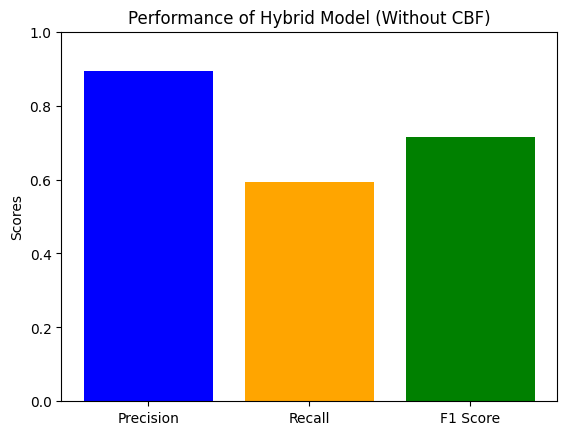

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for your model without CBF
model_name = 'Hybrid Model'
precision_score = 0.8935  # Your precision score
recall_score = 0.5941     # Your recall score
f1_score = 0.7137         # Your F1 score

# Create an array for the bar positions
scores = [precision_score, recall_score, f1_score]
labels = ['Precision', 'Recall', 'F1 Score']

# Create the bar chart
plt.bar(labels, scores, color=['blue', 'orange', 'green'])

# Adding labels and title
plt.ylabel('Scores')
plt.title(f'Performance of {model_name} (Without CBF)')
plt.ylim(0, 1)  # Set y-axis limits

# Show the plot
plt.show()


CONFUSION MATRIX(HYBRID MODEL)

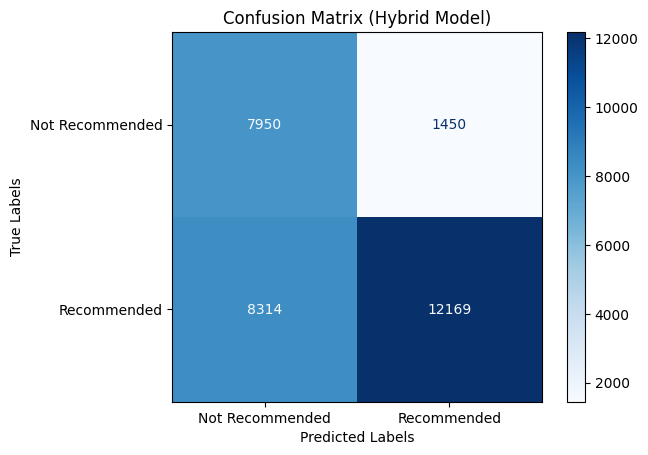

In [ ]:
# Assuming you have already generated predictions from SVD and KNN
# Let's say you want to combine predictions for the same test set
svd_predictions = {f"{pred[0]}_{pred[1]}": pred[3] for pred in svd.test(testset)}  # User_BookID: Rating from SVD
knn_predictions = {f"{pred[0]}_{pred[1]}": pred[3] for pred in knn.test(testset)}  # User_BookID: Rating from KNN

# Combine scores (you can define your own weighting scheme)
combined_scores = {}
for key in svd_predictions.keys():
    svd_score = svd_predictions.get(key, 0)
    knn_score = knn_predictions.get(key, 0)
    combined_scores[key] = (svd_score + knn_score) / 2  # Example: simple average of both predictions

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create binary labels based on a threshold (e.g., rating >= 4)
true_labels = [1 if rating >= 4 else 0 for user_id, book_id, rating in testset]
predicted_labels = [1 if combined_scores.get(f"{user_id}_{book_id}", 0) >= 4 else 0 for user_id, book_id, rating in testset]

# Calculate confusion matrix
cm_hybrid = confusion_matrix(true_labels, predicted_labels)

# Create a confusion matrix display
disp_hybrid = ConfusionMatrixDisplay(confusion_matrix=cm_hybrid, display_labels=['Not Recommended', 'Recommended'])
disp_hybrid.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Hybrid Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


ROC CURVE(HYBRID MODEL)

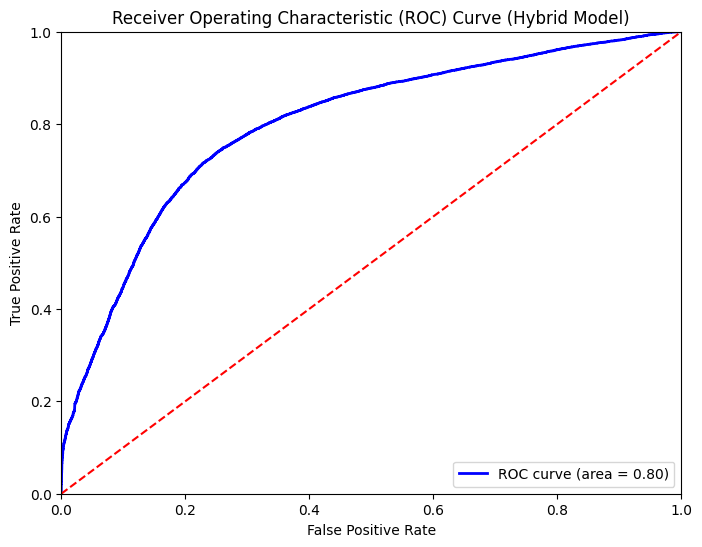

In [ ]:
# Assuming you have already generated predictions from SVD and KNN
# Let's say you want to combine predictions for the same test set
svd_predictions = {f"{pred[0]}_{pred[1]}": pred[3] for pred in svd.test(testset)}  # User_BookID: Rating from SVD
knn_predictions = {f"{pred[0]}_{pred[1]}": pred[3] for pred in knn.test(testset)}  # User_BookID: Rating from KNN

# Combine scores (you can define your own weighting scheme)
combined_scores = {}
for key in svd_predictions.keys():
    svd_score = svd_predictions.get(key, 0)
    knn_score = knn_predictions.get(key, 0)
    combined_scores[key] = (svd_score + knn_score) / 2  # Example: simple average of both predictions

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create binary labels based on a threshold (e.g., rating >= 4)
true_labels = [1 if rating >= 4 else 0 for user_id, book_id, rating in testset]
y_scores_hybrid = [combined_scores.get(f"{user_id}_{book_id}", 0) for user_id, book_id, rating in testset]

# Calculate ROC curve
fpr_hybrid, tpr_hybrid, thresholds_hybrid = roc_curve(true_labels, y_scores_hybrid)

# Calculate AUC (Area Under the Curve)
roc_auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_hybrid, tpr_hybrid, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_hybrid))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Hybrid Model)')
plt.legend(loc='lower right')
plt.show()


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Prepare your data (X, y) - example format
X = ratingss_df[['user_id', 'book_id']]  # Adjust with relevant features
y = (ratingss_df['rating'] >= 4).astype(int)  # Convert ratings into binary labels (liked or not liked)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate precision, recall, and F1 score
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f'Decision Tree - Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1 Score: {f1_dt:.4f}')


Decision Tree - Precision: 0.7289, Recall: 0.7265, F1 Score: 0.7277


BAR GRAPH(DECISION TREE)

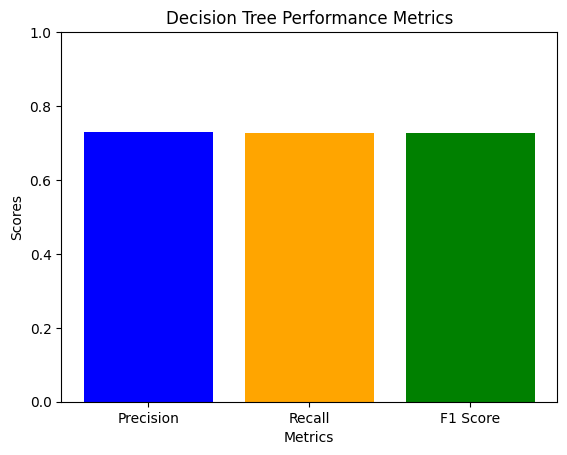

In [ ]:
import matplotlib.pyplot as plt

# Decision Tree metrics
precision_dt = 0.7289
recall_dt = 0.7265
f1_dt = 0.7277

# Data for the bar graph
metrics = ['Precision', 'Recall', 'F1 Score']
scores = [precision_dt, recall_dt, f1_dt]

# Create the bar graph
plt.bar(metrics, scores, color=['blue', 'orange', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Decision Tree Performance Metrics')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
plt.show()


CONFUSION MATRIX(DECISION TREE)

Length of true_labels: 2000
Length of predicted_labels: 2000


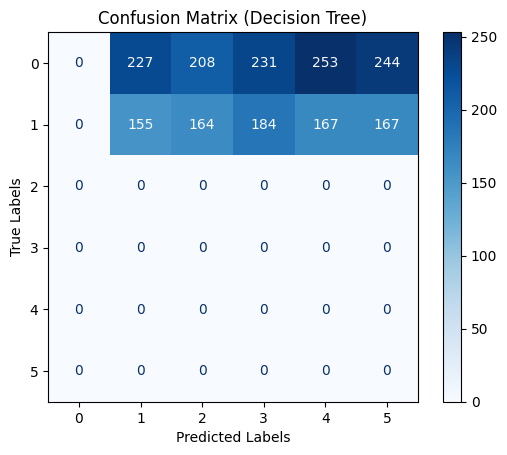

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset
data = pd.DataFrame({
    'feature1': np.random.rand(10000),  # Example feature 1
    'feature2': np.random.rand(10000),  # Example feature 2
    'ratings': np.random.randint(1, 6, 10000)  # Ratings between 1 and 5
})

# Define features and target
X = data[['feature1', 'feature2']]  # Replace with your actual feature columns
y = data['ratings']  # Assuming 'ratings' is the column with rating values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Generate true labels based on y_test
true_labels = [1 if rating >= 4 else 0 for rating in y_test]

# Generate predictions using your Decision Tree model on the test features
y_pred_dt = decision_tree_model.predict(X_test)

# Check lengths
print("Length of true_labels:", len(true_labels))
print("Length of predicted_labels:", len(y_pred_dt))

# Calculate confusion matrix only if lengths are the same
if len(true_labels) == len(y_pred_dt):
    cm_dt = confusion_matrix(true_labels, y_pred_dt)

    # Create a confusion matrix display
    disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
    disp_dt.plot(cmap=plt.cm.Blues, values_format='d')  # Add values_format='d' for integer display
    plt.title('Confusion Matrix (Decision Tree)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
else:
    print("Length mismatch: true_labels has", len(true_labels), "and predicted_labels has", len(y_pred_dt))


ROC CURVE(DECISION TREE)

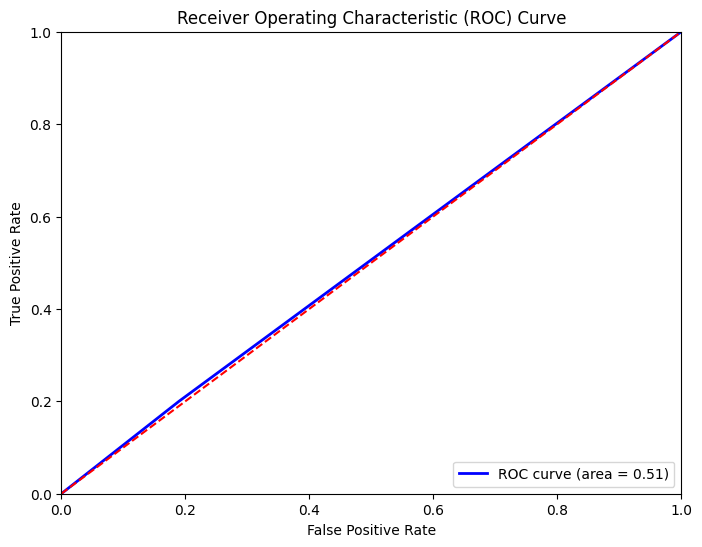

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
data = pd.DataFrame({
    'feature1': np.random.rand(10000),  # Example feature 1
    'feature2': np.random.rand(10000),  # Example feature 2
    'ratings': np.random.randint(1, 6, 10000)  # Ratings between 1 and 5
})

# Define features and target
X = data[['feature1', 'feature2']]  # Replace with your actual feature columns
y = data['ratings']  # Assuming 'ratings' is the column with rating values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Generate true labels based on y_test
true_labels = [1 if rating >= 4 else 0 for rating in y_test]

# Generate predictions using your Decision Tree model on the test features
y_pred_dt = decision_tree_model.predict(X_test)

# Get predicted probabilities for the positive class
y_scores = decision_tree_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, y_scores)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
!pip install imbalanced-learn


NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # To handle class imbalance

# Convert ratings to binary labels: 1 for 'liked' and 0 for 'not liked'
ratingss_df['liked'] = ratingss_df['rating'].apply(lambda x: 1 if x >= 4 else 0)

# Prepare features (e.g., user_id and book_id) and labels (liked)
X = ratingss_df[['user_id', 'book_id']]
y = ratingss_df['liked']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert to arrays for Naive Bayes input
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Naive Bayes - Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Naive Bayes - Precision: 0.5291, Recall: 0.5377, F1 Score: 0.5334


RIDGE CLASSIFIER

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize and train the Ridge Classifier
ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train, y_train)

# Make predictions
y_pred = ridge_clf.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Ridge Classifier - Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Ridge Classifier - Precision: 0.5301, Recall: 0.5205, F1 Score: 0.5253


RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE  # To handle class imbalance

# Load and preprocess data
# Ensure 'ratingss_df' is already loaded
ratingss_df['liked'] = ratingss_df['rating'].apply(lambda x: 1 if x >= 4 else 0)
X = ratingss_df[['user_id', 'book_id']]
y = ratingss_df['liked']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate and print evaluation metrics
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f'Random Forest - Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1 Score: {f1_rf:.4f}')


Random Forest - Precision: 0.5377, Recall: 0.6060, F1 Score: 0.5698


COMPARISION OF ALL MODELS

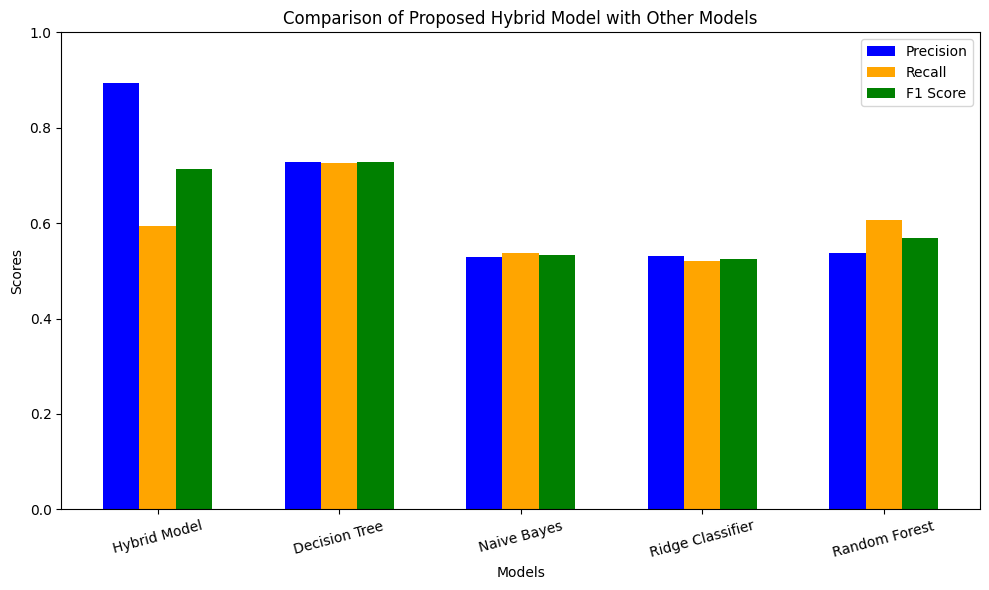

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and their scores
models = [
    'Hybrid Model',
    'Decision Tree',
    'Naive Bayes',
    'Ridge Classifier',
    'Random Forest'
]

precision_scores = [0.8935, 0.7289, 0.5291, 0.5301, 0.5377]
recall_scores = [0.5941, 0.7265, 0.5377, 0.5205, 0.6060]
f1_scores = [0.7137, 0.7277, 0.5334, 0.5253, 0.5698]

# Set the position for each bar
bar_width = 0.2
x = np.arange(len(models))

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, precision_scores, width=bar_width, label='Precision', color='blue')
plt.bar(x, recall_scores, width=bar_width, label='Recall', color='orange')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1 Score', color='green')

# Adding labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Proposed Hybrid Model with Other Models')
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1)  # Set y-axis limits
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
